In [21]:
# https://scipy.github.io/devdocs/tutorial/optimize.html#nelder-mead-simplex-algorithm-method-nelder-mead
def func(x,x0,y0):
    return y0+(x-x0)**2

x0 = 10
res = minimize(func, x0, method='nelder-mead',
               args=(1, 10), options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 10.000000
         Iterations: 33
         Function evaluations: 68


In [22]:
res.x

array([1.])

In [33]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise

In [43]:
p_opt, p_cov = curve_fit(func, xdata, ydata, bounds=(-np.inf, [3.5, 1.5, 0.5]))
print(p_opt)
print(np.sqrt(np.diag(p_cov)))

[2.76983329 1.44283891 0.45365001]
[0.10506757 0.11299426 0.04103641]


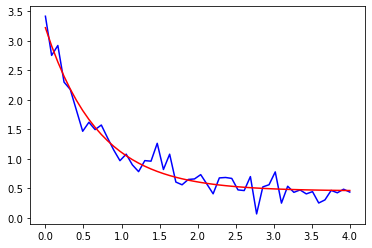

In [44]:
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *p_opt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.show()